# Restaurant Reviews Dataset Project

This project involves generating a dataset of restaurant reviews using the `faker` library, performing exploratory data analysis, cleaning the data, engineering features, analyzing the data, and (optionally) visualizing the findings. The end goal is to gain insights into restaurant ratings and reviewer behaviors.

## Setup and Dataset Generation

First, we need to install the necessary libraries and generate our dataset using `faker`. The dataset will include restaurant names, reviewer names, review texts, ratings, dates of visit, and locations.

In [24]:
import pandas as pd
from faker import Faker
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Faker and generate the dataset
fake = Faker()

data = []
for _ in range(500):
    date_of_visit = fake.date_between(start_date='-2y', end_date='today')
    date_of_review = fake.date_between(start_date=date_of_visit, end_date='today')
    data.append({
        "Restaurant Name": fake.company(),
        "Reviewer Name": fake.name(),
        "Review Text": fake.text(max_nb_chars=200),  # Keep reviews concise
        "Rating": random.randint(1, 5),
        "Date of Visit": date_of_visit,
        "Date of Review": date_of_review,
        "Location": fake.city()
    })

df = pd.DataFrame(data)
df.to_csv('restaurant_reviews.csv', index=False)


## As per task description, we must re-read the dataset from the file

In [25]:
df = pd.read_csv('restaurant_reviews.csv')

## Data Exploration

Let's start by getting a feel for the data. We will display the first ten rows and then print summary statistics for the numerical columns.

In [26]:
# Display the first 10 rows of the dataset
df.head(10)

,Restaurant Name,Reviewer Name,Review Text,Rating,Date of Visit,Date of Review,Location
0,Murphy Ltd,Jonathan Hernandez,Themselves several front certain create avoid....,1,2022-08-23,2023-05-03,Clarkburgh
1,Norris and Sons,Kevin Henderson,Chance require north produce. Road institution...,3,2024-01-20,2024-02-07,Lynnfort
2,"Kim, Mcguire and Lee",Bianca Martin,Open half her common chance. Room able authori...,3,2022-04-25,2023-06-28,East Suzanne
3,Rodriguez Group,Cindy Clay,Rise toward project maintain decade wide.\nMan...,2,2023-06-28,2023-07-12,Crystaltown
4,Moore-Castillo,Angela Brock,Beat help outside beyond it animal.\nCard each...,5,2023-01-28,2023-07-04,West Juliefurt
5,Carlson-Davis,Barbara Rodriguez,Movie second certainly probably own figure sev...,3,2023-01-26,2023-09-14,Salazartown
6,"Wong, Hodges and Parsons",Carla Marshall,Traditional color loss shake. Girl relate retu...,4,2024-01-03,2024-02-19,South Jacqueline
7,Edwards-Nguyen,Ryan Combs,Magazine president statement everything genera...,3,2022-03-22,2022-11-28,New Vanessa
8,"Howard, Rich and Jones",Elaine Duarte,Beat during news drive exactly century. Tradit...,3,2022-11-03,2023-06-30,Raychester
9,Evans LLC,Aimee Jones,Air hour attention perhaps. Among address appl...,4,2022-11-11,2024-01-04,West Robertfort


In [27]:
# Summary statistics for the numerical columns
df.describe()

,Rating
count,500.000000
mean,3.020000
std,1.412654
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


## Data Cleaning

We'll check for any missing values in our dataset and ensure all ratings fall within the 1 to 5 range, adjusting them if necessary.

In [28]:
# Check for any missing values
print(df.isnull().sum())

# Ensure ratings are within the 1 to 5 range
df['Rating'] = df['Rating'].clip(1, 5)


Restaurant Name    0
Reviewer Name      0
Review Text        0
Rating             0
Date of Visit      0
Date of Review     0
Location           0
dtype: int64


## Feature Engineering

To potentially uncover more insights, we'll add a new column that calculates the length of each review.

In [29]:
# Create a new column "Review Length"
df['Review Length'] = df['Review Text'].apply(lambda x: len(x.split()))

## Data Analysis tasks:

In [30]:
# Average rating for each restaurant
average_ratings = df.groupby('Restaurant Name')['Rating'].mean().sort_values(ascending=False)
print(average_ratings.head(10))

Restaurant Name
Young Group                    5.0
Rodriguez-Morgan               5.0
Doyle-Collins                  5.0
Moore-Castillo                 5.0
Moreno, Taylor and Jones       5.0
Mosley-Kramer                  5.0
Murphy-Johnson                 5.0
Murray, Martin and Bailey      5.0
Norman, Clark and Rodriguez    5.0
Norris Ltd                     5.0
Name: Rating, dtype: float64


In [31]:
# 5 most frequent reviewers
frequent_reviewers = df['Reviewer Name'].value_counts().head(5)
print(frequent_reviewers)

Reviewer Name
Michael Davis        2
Christopher Brown    2
Daniel Murphy        2
John Savage          1
Robin Martin         1
Name: count, dtype: int64


In [32]:
# Average rating per month (we take the last 12 months)

df['Date of Review'] = pd.to_datetime(df['Date of Review'])
max_date = df['Date of Review'].max()
start_date = max_date - pd.DateOffset(months=12)
df_filtered = df[(df['Date of Review'] > start_date) & (df['Date of Review'] <= max_date)].copy()
df_filtered.loc[:, 'Year'] = df_filtered['Date of Review'].dt.year
df_filtered.loc[:, 'Month'] = df_filtered['Date of Review'].dt.month
average_monthly_rating = df_filtered.groupby(['Year', 'Month'])['Rating'].mean()
print(average_monthly_rating)

Year  Month
2023  3        1.750000
      4        2.538462
      5        3.125000
      6        3.043478
      7        3.115385
      8        3.133333
      9        3.064516
      10       2.756757
      11       2.822222
      12       3.047619
2024  1        3.442308
      2        3.051282
      3        3.555556
Name: Rating, dtype: float64


In [33]:
# Restaurant with the most reviews
most_reviews = df['Restaurant Name'].value_counts().idxmax()
print(most_reviews)

Murphy Ltd


In [34]:
# Calculate the average rating for each city
city_average_ratings = df.groupby('Location')['Rating'].mean().sort_values(ascending=False)

# Display the city with the highest average rating
highest_rated_city = city_average_ratings.idxmax()
highest_rating = city_average_ratings.max()

print(f"The city with the highest average rating is {highest_rated_city}, with an average rating of {highest_rating:.2f}.")


The city with the highest average rating is Donnaborough, with an average rating of 5.00.


## Visualization (Optional)

Visualizations can help us better understand the distribution of ratings and observe trends over time.

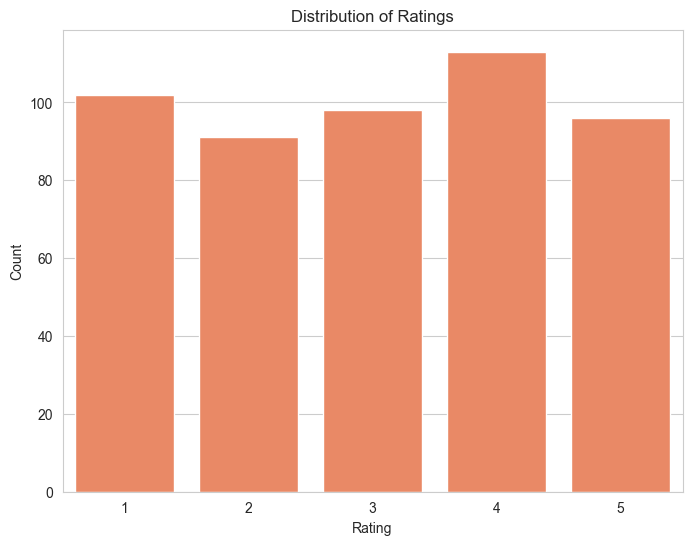

In [35]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df, color='coral')  # Use color instead of palette
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

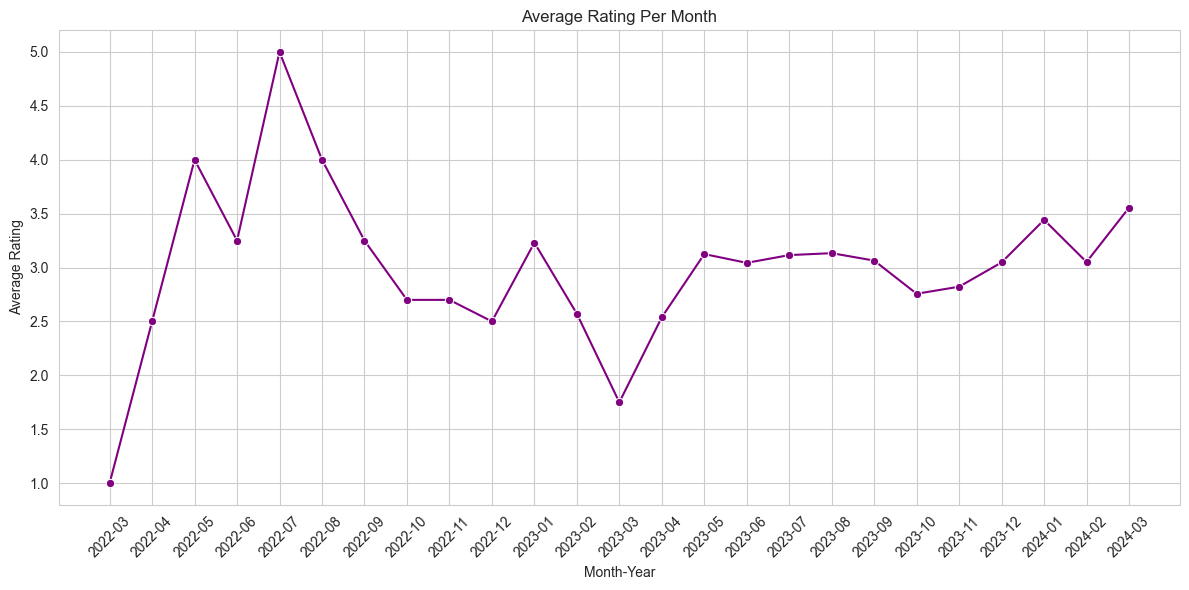

In [36]:
# Ensure 'Review Date' is a datetime type
df['Date of Review'] = pd.to_datetime(df['Date of Review'])
df['Month-Year'] = df['Date of Review'].dt.to_period('M')

# Calculate the average rating per month-year
monthly_avg_rating = df.groupby('Month-Year')['Rating'].mean().reset_index()
monthly_avg_rating['Month-Year'] = monthly_avg_rating['Month-Year'].astype(str)  # For plotting

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month-Year', y='Rating', data=monthly_avg_rating, marker='o', color='purple')
plt.xticks(rotation=45)
plt.title('Average Rating Per Month')
plt.xlabel('Month-Year')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

## Exporting Results

Finally, we save our cleaned and manipulated DataFrame to a new CSV file for future use or further analysis.

In [14]:
df.to_csv('cleaned_restaurant_reviews.csv', index=False)

# Conclusion

In this notebook, we've generated a synthetic dataset of restaurant reviews, conducted exploratory data analysis, cleaned the data, engineered features, and performed detailed analysis to understand the dynamics of restaurant ratings and reviewer behavior. This project demonstrates the power of Python and Pandas for data manipulation and analysis.